In [46]:
# Instalar las librerias necesarias para el trabajo
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob
import os
import matplotlib.pyplot as plt

In [47]:
# Cargar los datos para saber como están sin proceso de limpieza
comentarios = pd.read_csv('solocomentarios.csv')
comentarios

,wiI7pd
0,Un maltrato increíble. El guardia no deja entr...
1,Pésimo servicio. Tiempo de espera de más de 4 ...
2,"Hoy 27/06/23, necesitaba saber que paso con un..."
3,Pesimo servicio 3 horas para atencion y 3 maa ...
4,"El servicio lento, inoperante, burocrático, de..."
...,...
1888,NaN
1889,NaN
1890,NaN
1891,NaN


# Limpieza de los datos

In [48]:
# Leer el archivo 
df = pd.read_csv('solocomentarios.csv')
# Eliminar la filas que tenga vacios
datosLimpios = df.dropna()
# Mostrar el dataset
datosLimpios

# Guardar el dataset limpio sin vacios llamando 'comentarios'
datosLimpios.to_csv('comentarios1.csv', index=False)

print("El DataFrame limpio se ha guardado en 'comentariosLimpios.csv'.")

#Mostrar
datosLimpios

El DataFrame limpio se ha guardado en 'comentariosLimpios.csv'.


,wiI7pd
0,Un maltrato increíble. El guardia no deja entr...
1,Pésimo servicio. Tiempo de espera de más de 4 ...
2,"Hoy 27/06/23, necesitaba saber que paso con un..."
3,Pesimo servicio 3 horas para atencion y 3 maa ...
4,"El servicio lento, inoperante, burocrático, de..."
...,...
1861,Bien
1862,Exelente
1863,Trato oportuno
1864,Bueno


In [49]:
# Asignar el DataFrame cargado a df_cleaned
df_cleaned = datosLimpios.copy()
# Funcion de Limpieza
def limpiar_comentarios(texto):
    texto = re.sub(r'^RT[\s]+', '', texto)
    texto = re.sub(r'https?:\/\/.*[\r\n*]', '', texto)
    texto = re.sub(r'#', '', texto)
    texto = re.sub(r'@[A-Za-z0-9_]+', '', texto)
    texto = re.sub(r'http\S+|www.\S+|pic.\S+|\S+.com\S*|\S+.org\S*|\S+.net\S*', '', texto)
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = re.sub(r'^\d+$', '', texto)
    return texto.lower().strip()

In [50]:
# Limpieza de la columna comentarios en este caso se llama wiI7pd
if 'wiI7pd' in df_cleaned.columns:
    df_cleaned['wiI7pd'] = df_cleaned['wiI7pd'].apply(limpiar_comentarios)
else:
    print("La columna 'wiI7pd' no existe en el DataFrame.")

# Guardar el DataFrame limpio en un nuevo archivo CSV
df_cleaned.to_csv('comentarios2.csv', index=False)

In [51]:
# Cargar los datos desde un archivo CSV
cm_antes = pd.read_csv('comentarios1.csv')
cm_despues = pd.read_csv('comentarios2.csv')

# Mostrar las primeras filas de ambos DataFrames para verificar la carga correcta
print("Primeras filas del DataFrame original:")
print(cm_antes.head())

print("Primeras filas del DataFrame limpio:")
print(cm_despues.head())

Primeras filas del DataFrame original:
                                              wiI7pd
0  Un maltrato increíble. El guardia no deja entr...
1  Pésimo servicio. Tiempo de espera de más de 4 ...
2  Hoy 27/06/23, necesitaba saber que paso con un...
3  Pesimo servicio 3 horas para atencion y 3 maa ...
4  El servicio lento, inoperante, burocrático, de...
Primeras filas del DataFrame limpio:
                                              wiI7pd
0  un maltrato increíble el guardia no deja entra...
1  pésimo servicio tiempo de espera de más de 4 h...
2  hoy 270623 necesitaba saber que paso con una d...
3  pesimo servicio 3 horas para atencion y 3 maa ...
4  el servicio lento inoperante burocrático des h...


In [52]:
# Eliminar nuevamente filas vacias
df = pd.read_csv('comentarios2.csv')
# Eliminar la filas que tenga vacios
datosLimpios = df.dropna()
# Mostrar el dataset
datosLimpios

# Guardar el dataset limpio sin filas vacias
datosLimpios.to_csv('comentarios3.csv', index=False)

print("El DataFrame limpio se ha guardado en 'comentarios3.csv'.")

#Mostrar
datosLimpios

El DataFrame limpio se ha guardado en 'comentarios3.csv'.


,wiI7pd
0,un maltrato increíble el guardia no deja entra...
1,pésimo servicio tiempo de espera de más de 4 h...
2,hoy 270623 necesitaba saber que paso con una d...
3,pesimo servicio 3 horas para atencion y 3 maa ...
4,el servicio lento inoperante burocrático des h...
...,...
1178,bien
1179,exelente
1180,trato oportuno
1181,bueno


In [53]:
# Eliminar filas manualmente después de revisar si algunos datos que no sirven o tenga una palabra inadeacuado

df = pd.read_csv('comentarios3.csv').drop(index=[261, 416, 660, 690, 1083, 1084,])

# Guardar el DataFrame modificado en un nuevo archivo CSV
df.to_csv('comentarios4.csv', index=False)

In [54]:
# Eliminar registros duplicados del dataset

df = pd.read_csv('comentarios4.csv').drop_duplicates()

# Guardar el DataFrame modificado sin duplicados en un nuevo archivo CSV
df.to_csv('comentarios5.csv', index=False)

In [55]:
# Mostrar los cambios que existe de los filtros que se realizaron
original = pd.read_csv('solocomentarios.csv')
limpiando = pd.read_csv('comentarios4.csv')
resultado = pd.read_csv('comentarios5.csv')

print(original.count())
print( limpiando.count())
print( resultado.count())

wiI7pd    1183
dtype: int64
wiI7pd    1171
dtype: int64
wiI7pd    1100
dtype: int64


In [56]:
# Cargar el conjunto de datos desde un archivo CSV
archivo = 'comentarios5.csv'
df = pd.read_csv(archivo)
# Visualizar los primeros registros para verificar la estructura
print(df.head())

                                              wiI7pd
0  un maltrato increíble el guardia no deja entra...
1  pésimo servicio tiempo de espera de más de 4 h...
2  hoy 270623 necesitaba saber que paso con una d...
3  pesimo servicio 3 horas para atencion y 3 maa ...
4  el servicio lento inoperante burocrático des h...


In [57]:
from deep_translator import GoogleTranslator
from concurrent.futures import ThreadPoolExecutor, as_completed

# Cargar el archivo CSV
df = pd.read_csv('comentarios5.csv')

# Inicializar el traductor
translator = GoogleTranslator(source='es', target='en')

# Función para traducir un comentario
def traducir_comentario(comentario):
    try:
        return translator.translate(comentario)
    except Exception as e:
        print(f"Error al traducir comentario: {comentario}\nError: {e}")
        return comentario  # En caso de error, dejar el comentario original

# Crear una lista para almacenar los comentarios traducidos
comentarios_traducidos = []

# Usar ThreadPoolExecutor para paralelizar el proceso de traducción
with ThreadPoolExecutor(max_workers=10) as executor:
    future_to_comentario = {executor.submit(traducir_comentario, row['wiI7pd']): index for index, row in df.iterrows()}
    for future in as_completed(future_to_comentario):
        index = future_to_comentario[future]
        try:
            traducido = future.result()
        except Exception as e:
            print(f"Error al obtener resultado de la traducción en fila {index}: {e}")
            traducido = df.loc[index, 'wiI7pd']  # En caso de error, dejar el comentario original
        comentarios_traducidos.append(traducido)

# Añadir la columna de comentarios traducidos al DataFrame
df['comentarios_traducidos'] = comentarios_traducidos

# Guardar el DataFrame con los comentarios traducidos en un nuevo archivo CSV
df.to_csv('traducidoIngles.csv', index=False)

print("Traducción completada y guardada en 'traducidoIngles.csv'")


Traducción completada y guardada en 'traducidoIngles.csv'


In [62]:
traducido = pd.read_csv('traducidoIngles.csv')
print((traducido.head()))

                                              wiI7pd  \
0  un maltrato increíble el guardia no deja entra...   
1  pésimo servicio tiempo de espera de más de 4 h...   
2  hoy 270623 necesitaba saber que paso con una d...   
3  pesimo servicio 3 horas para atencion y 3 maa ...   
4  el servicio lento inoperante burocrático des h...   

                              comentarios_traducidos  
0  It is a very old hospital that needs urgent re...  
1  The slow, inoperative bureaucratic service deh...  
2  Total regret, I took my daughter with a fever ...  
3  The slow, inoperative bureaucratic service deh...  
4  The slow, inoperative bureaucratic service deh...  


### Clasificación de Comentarios

In [64]:
# Función para obtener la polaridad del comentario
def obtener_polaridad(texto):
    analisis = TextBlob(texto)
    resultado = analisis.sentiment.polarity
    return resultado

# Cargar el archivo CSV
df = pd.read_csv('traducidoIngles.csv')

# Verificar si la columna 'comentarios_traducidos' está presente
if 'comentarios_traducidos' not in df.columns:
    raise ValueError("El archivo CSV no contiene una columna 'comentarios_traducidos'.")

# Aplicar el análisis de sentimiento
df['polaridad'] = df['comentarios_traducidos'].apply(obtener_polaridad)

# Mostrar los resultados intermedios
df.head()

,wiI7pd,comentarios_traducidos,polaridad
0,un maltrato increíble el guardia no deja entra...,It is a very old hospital that needs urgent re...,0.288333
1,pésimo servicio tiempo de espera de más de 4 h...,"The slow, inoperative bureaucratic service deh...",-0.200000
2,hoy 270623 necesitaba saber que paso con una d...,"Total regret, I took my daughter with a fever ...",-0.283333
3,pesimo servicio 3 horas para atencion y 3 maa ...,"The slow, inoperative bureaucratic service deh...",-0.200000
4,el servicio lento inoperante burocrático des h...,"The slow, inoperative bureaucratic service deh...",-0.200000


In [65]:
# Función para clasificar el sentimiento según su polaridad
def sentimiento(label):
    if label < 0:
        return "negativo"
    elif label == 0:
        return "neutro"
    elif label > 0:
        return "positivo"

# Aplicar la función sentimiento
df['etiquetas_TB'] = df['polaridad'].apply(sentimiento)

# Guardar el archivo con su clasificación
df.to_csv('comentariosClasificadosPolaridad.csv', index=False)

# Mostrar los resultados intermedios
df.head()

,wiI7pd,comentarios_traducidos,polaridad,etiquetas_TB
0,un maltrato increíble el guardia no deja entra...,It is a very old hospital that needs urgent re...,0.288333,positivo
1,pésimo servicio tiempo de espera de más de 4 h...,"The slow, inoperative bureaucratic service deh...",-0.200000,negativo
2,hoy 270623 necesitaba saber que paso con una d...,"Total regret, I took my daughter with a fever ...",-0.283333,negativo
3,pesimo servicio 3 horas para atencion y 3 maa ...,"The slow, inoperative bureaucratic service deh...",-0.200000,negativo
4,el servicio lento inoperante burocrático des h...,"The slow, inoperative bureaucratic service deh...",-0.200000,negativo


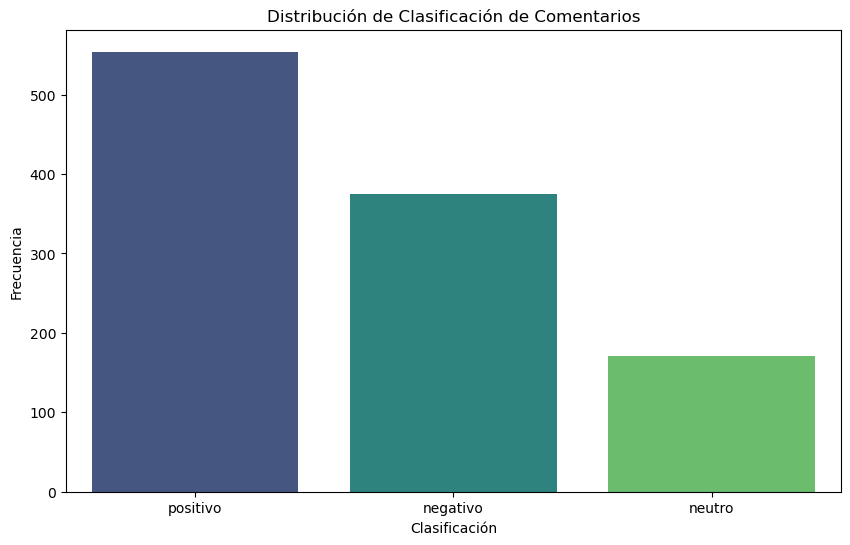

In [66]:
# Gráfico de acuerdo a la clasificación que realiza la función sin analisis -
# -personal para mencionar que el comentarios es negativo o positivo 
# Gráfico de barras para la clasificación de sentimientos
plt.figure(figsize=(10, 6))
sns.countplot(x='etiquetas_TB', data=df, palette='viridis')
plt.title('Distribución de Clasificación de Comentarios')
plt.xlabel('Clasificación')
plt.ylabel('Frecuencia')
plt.show()

In [67]:
# Verificar la distribución actual de los sentimientos
distribucion = df['etiquetas_TB'].value_counts()

# Mostrar la distribución
print(distribucion)

etiquetas_TB
positivo    554
negativo    375
neutro      171
Name: count, dtype: int64


In [73]:
# Cargar el archivo clasificado
df = pd.read_csv('comentariosClasificadosPolaridad.csv')

# Seleccionar solo la columna de comentarios en español y la etiqueta
df_seleccionado = df[['wiI7pd', 'etiquetas_TB']]

# Guardar el nuevo archivo con solo las columnas seleccionadas
df_seleccionado.to_csv('comentariosEtiquetados.csv', index=False)

# Mostrar las primeras filas del dataframe seleccionado
df_seleccionado.head()


,wiI7pd,etiquetas_TB
0,un maltrato increíble el guardia no deja entra...,positivo
1,pésimo servicio tiempo de espera de más de 4 h...,negativo
2,hoy 270623 necesitaba saber que paso con una d...,negativo
3,pesimo servicio 3 horas para atencion y 3 maa ...,negativo
4,el servicio lento inoperante burocrático des h...,negativo


# Selección de los comentarios Positivo, Negativo y Neutro

In [79]:
#Dataset según la clasificación de CHATGPT con todo el dataset en base a comentarios etiquetados anteriormente

df = pd.read_csv('comentariosClasificadosCHATGPT.csv')

# Mostrar las primeras filas del dataframe seleccionado
print(df.head())

                                         Comentarios Sentimiento
0  un maltrato increíble el guardia no deja entra...    negativo
1  pésimo servicio tiempo de espera de más de 4 h...    negativo
2  hoy 270623 necesitaba saber que paso con una d...      neutro
3  pésimo servicio 3 horas para atencion y 3 más ...    negativo
4  el servicio lento inoperante burocrático des h...    negativo


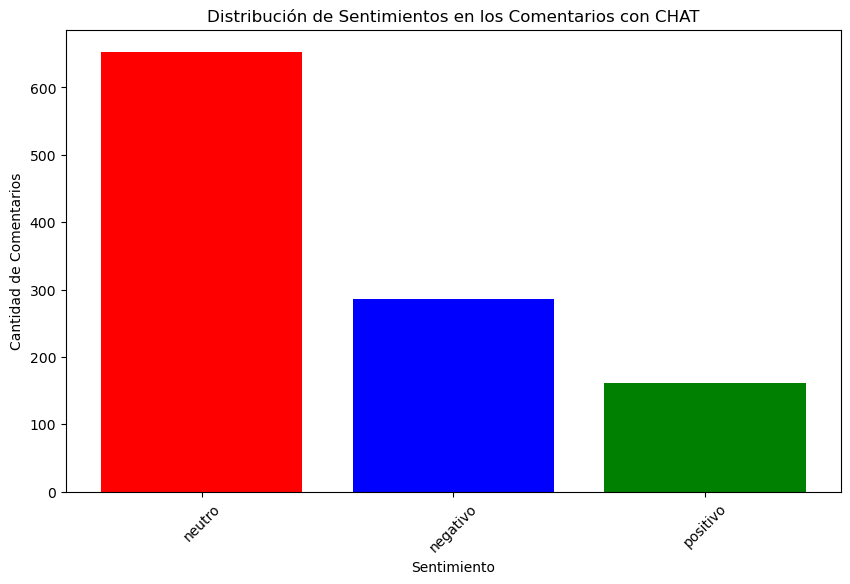

In [84]:
# Cargar el dataset
df = pd.read_csv('comentariosClasificadosCHATGPT.csv')

# Contar la cantidad de comentarios por cada categoría de sentimiento
sentiment_counts = df['Sentimiento'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'blue', 'green'])
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.title('Distribución de Sentimientos en los Comentarios con CHAT')
plt.xticks(rotation=45)
plt.show()


In [85]:
# Verificar la distribución  sentimientos
distribucion = df['Sentimiento'].value_counts()

# Mostrar la distribución
print(distribucion)

Sentimiento
neutro      653
negativo    286
positivo    161
Name: count, dtype: int64


## Selección de los 166 comentarios manualmente validando si lo que dice el ChatGPT es adecuada

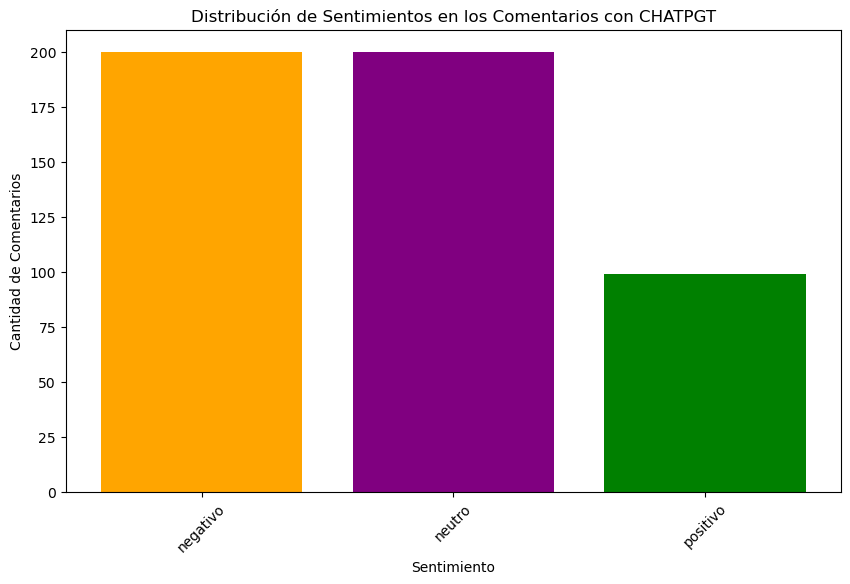

In [94]:
# Lo que el Chat Selecciono y Califico los 165 comentarios
df = pd.read_csv('comentarios166CHATGPT.csv')

# Contar la cantidad de comentarios por cada categoría de sentimiento
sentiment_counts = df['Sentimiento'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['orange', 'purple', 'green'])
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.title('Distribución de Sentimientos en los Comentarios con CHATPGT')
plt.xticks(rotation=45)
plt.show()

In [95]:
#Resultado de como ChatGTP lo selecciono
chat = pd.read_csv('comentarios166CHATGPT.csv')
chat = df['Sentimiento'].value_counts()

# Mostrar la distribución
print(chat)

Sentimiento
negativo    200
neutro      200
positivo     99
Name: count, dtype: int64


## Selección y validación manual de los comentarios en EXCEL

In [107]:
# Se selecciona los comentarios que hizo chat por cuenta propia para ver si es valido o no
# Leer el archivo Excel
file_path_excel = 'datosSeleccionadosEtiquetadosIEES.xlsx' 
comentarios_excel_df = pd.read_excel(file_path_excel)

# Guardar el DataFrame como un archivo CSV
output_csv_path = 'datosSeleccionadosEtiquetadosIEES.csv'
comentarios_excel_df.to_csv(output_csv_path, index=False)

print(f"Archivo CSV guardado en: {output_csv_path}")

comentarios_excel_df

Archivo CSV guardado en: datosSeleccionadosEtiquetadosIEES.csv


,Comentarios,Sentimiento
0,es un excelente centro médico de atención lame...,neutro
1,buen servicio y excelente atención médica y at...,positivo
2,hospital nuevo tiene más o menos un año equipo...,positivo
3,instalaciones siguen en buenas condiciones es...,positivo
4,excelente hospital con un amplio parqueadero q...,positivo
...,...,...
494,buena atención cuidan procedimientos anti covid,positivo
495,día de hoy mi hija tenía cita cita médica per...,neutro
496,no hay turnos por no hay medicinas no atiende...,negativo
497,se puede mejorar atención a pacientes en ár...,neutro


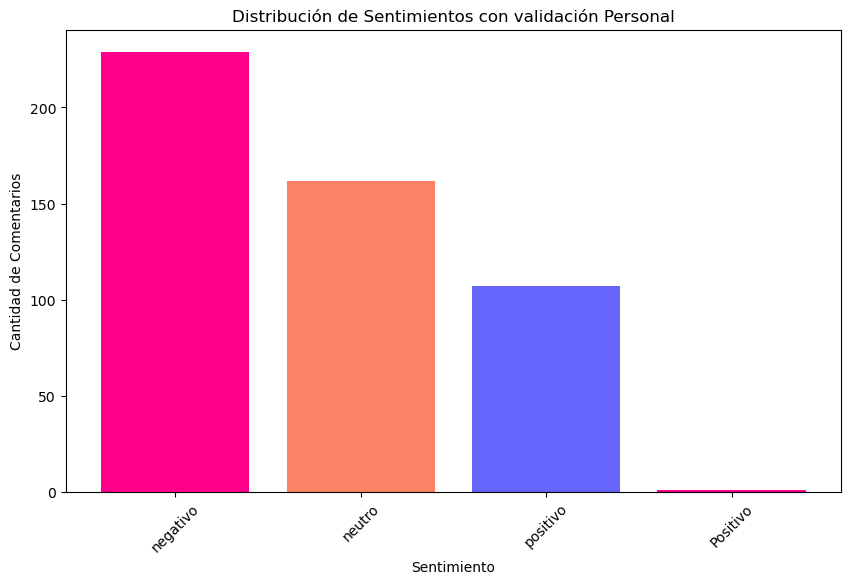

In [124]:
#Clasificación personal de acuerdo  a los comentarios que mando el Chat
df = pd.read_csv('datosSeleccionadosEtiquetadosIEES.csv')

# Contar la cantidad de comentarios por cada categoría de sentimiento
sentiment_counts = df['Sentimiento'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['#FF008D', '#FC8265', '#6565FC'])
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.title('Distribución de Sentimientos con validación Personal')
plt.xticks(rotation=45)
plt.show()

In [123]:
seleccionados = pd.read_csv('datosSeleccionadosEtiquetadosIEES.csv')
seleccionados = df['Sentimiento'].value_counts()

# Mostrar la distribución
print(seleccionados)

Sentimiento
negativo    229
neutro      162
positivo    107
Positivo      1
Name: count, dtype: int64


## Selección de 107 instancias por cada una Positivo, Negativo y Neutro

Se selecciona 107 instanacias, considerando que los comentarios positivos son de 107 lo cual se escogeran de 
negativos 107 y neutros 107

In [125]:
# Leer el archivo Excel
file_path_excel = 'datosBalanceadosFin.xlsx'  # Asegúrate de que el archivo esté en el mismo directorio o proporciona la ruta completa
comentarios_excel_df = pd.read_excel(file_path_excel)

# Guardar el DataFrame como un archivo CSV
output_csv_path = 'datosBalanceadosFin.csv'
comentarios_excel_df.to_csv(output_csv_path, index=False)

print(f"Archivo CSV guardado en: {output_csv_path}")

comentarios_excel_df

Archivo CSV guardado en: datosBalanceadosFin.csv


,Comentarios,Sentimiento
0,es un excelente centro médico de atención lame...,neutro
1,buen servicio y excelente atención médica y at...,positivo
2,hospital nuevo tiene más o menos un año equipo...,positivo
3,instalaciones siguen en buenas condiciones es...,positivo
4,excelente hospital con un amplio parqueadero q...,positivo
...,...,...
319,buena atención cuidan procedimientos anti covid,positivo
320,día de hoy mi hija tenía cita cita médica per...,neutro
321,no hay turnos por no hay medicinas no atiende...,negativo
322,se puede mejorar atención a pacientes en ár...,neutro


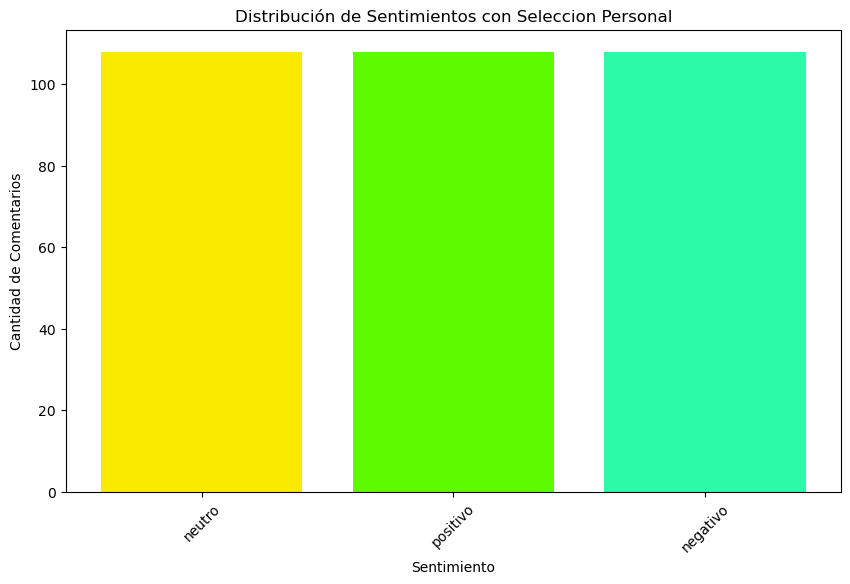

In [133]:
# GRafico del balance de acuerdo a la seleccion personal de los comentarios con 108 instancias
df = pd.read_csv('datosBalanceadosFin.csv')

# Contar la cantidad de comentarios por cada categoría de sentimiento
sentiment_counts = df['Sentimiento'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['#FAEA00', '#5EFA00', '#2DFAA9'])
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.title('Distribución de Sentimientos con Seleccion Personal')
plt.xticks(rotation=45)
plt.show()

### Balance Final de los comentarios seleccionados y etiquetados 

In [132]:
balanceado = pd.read_csv('datosBalanceadosFin.csv')
balanceado = df['Sentimiento'].value_counts()

# Mostrar la distribución
print(balanceado)

Sentimiento
neutro      108
positivo    108
negativo    108
Name: count, dtype: int64
